In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [3]:
!unzip "/content/shapes.zip" -d "/content"


Streaming output truncated to the last 5000 lines.
  inflating: /content/shapes/star/3235.png  
  inflating: /content/shapes/star/3236.png  
  inflating: /content/shapes/star/3237.png  
  inflating: /content/shapes/star/3238.png  
  inflating: /content/shapes/star/3239.png  
  inflating: /content/shapes/star/324.png  
  inflating: /content/shapes/star/3240.png  
  inflating: /content/shapes/star/3241.png  
  inflating: /content/shapes/star/3242.png  
  inflating: /content/shapes/star/3243.png  
  inflating: /content/shapes/star/3244.png  
  inflating: /content/shapes/star/3245.png  
  inflating: /content/shapes/star/3246.png  
  inflating: /content/shapes/star/3247.png  
  inflating: /content/shapes/star/3248.png  
  inflating: /content/shapes/star/3249.png  
  inflating: /content/shapes/star/325.png  
  inflating: /content/shapes/star/3250.png  
  inflating: /content/shapes/star/3251.png  
  inflating: /content/shapes/star/3252.png  
  inflating: /content/shapes/star/3253.png  
  infl

In [3]:
import os
import numpy as np
from PIL import Image

def load_images_and_labels(data_dir, img_size=(28, 28)):
    X = []  # image arrays
    y = []  # labels

    class_names = sorted(os.listdir(data_dir))  # consistent label ordering

    for label, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            img_path = os.path.join(class_path, file_name)

            try:
                img = Image.open(img_path).convert('L')  # grayscale
                img = img.resize(img_size)
                img_array = np.array(img) / 255.0         # normalize
                img_array = np.expand_dims(img_array, axis=-1)  # shape: (28,28,1)

                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(X), np.array(y), class_names


In [4]:
# Path to folder where all images are stored (in Google Drive)
data = '/content/shapes'

# Load images
X, y, class_names = load_images_and_labels(data)

# Show shapes and class labels
print("Shape of X:", X.shape)          # e.g., (100, 784)
print("Shape of y:", y.shape)          # e.g., (100,)
print("Class labels:", class_names)    # e.g., ['circle', 'square', 'triangle']


Shape of X: (14970, 28, 28, 1)
Shape of y: (14970,)
Class labels: ['circle', 'square', 'star', 'triangle']


In [5]:
X.shape

(14970, 28, 28, 1)

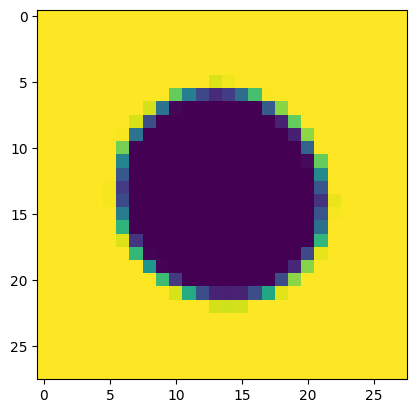

In [6]:
plt.imshow(X[0])

In [27]:
!pip uninstall -y scikit-learn
!pip install -U scikit-learn


Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


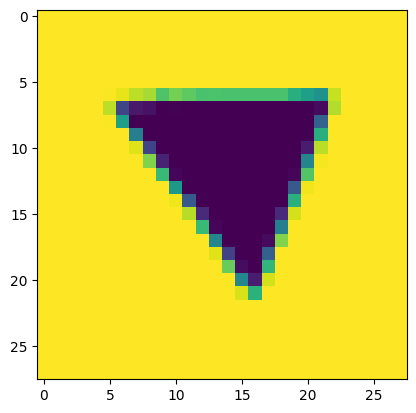

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train[0].shape

(28, 28, 1)

In [10]:
X_train

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9839 - loss: 0.0646 - val_accuracy: 0.9967 - val_loss: 0.0219
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9907 - loss: 0.0355 - val_accuracy: 0.9983 - val_loss: 0.0110
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9958 - loss: 0.0193 - val_accuracy: 0.9958 - val_loss: 0.0135
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9924 - loss: 0.0220 - val_accuracy: 0.9979 - val_loss: 0.0070
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9986 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9754 - val_loss: 0.0654
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0

In [18]:
y_prob=model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [19]:
y_pred=y_prob.argmax(axis=-1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9993319973279893

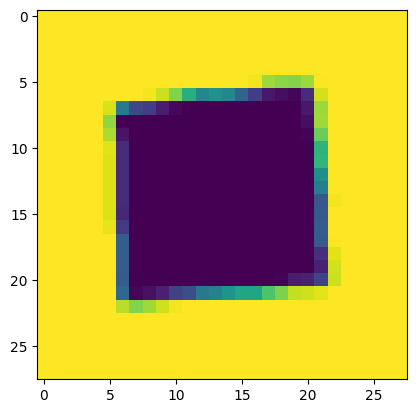

In [21]:
plt.imshow(X_test[2])

In [24]:
class_names[np.argmax(model.predict(X_test[2].reshape(1, 28, 28, 1)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'square'

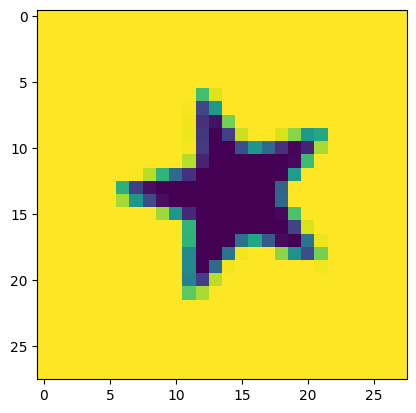

In [27]:
plt.imshow(X_test[3])

In [28]:
class_names[np.argmax(model.predict(X_test[3].reshape(1, 28, 28, 1)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


'star'

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_shape_from_image(image_path, model, class_names):
    # Step 1: Load image, convert to grayscale
    img = Image.open(image_path).convert('L')

    # Step 2: Resize to 28x28
    img = img.resize((28, 28))

    # Step 3: Convert to numpy array and normalize
    img_array = np.array(img) / 255.0

    # Step 4: Reshape to match model input (batch_size, 28, 28, 1)
    input_image = img_array.reshape(1, 28, 28, 1)

    # Step 5: Make prediction
    prediction = model.predict(input_image)
    predicted_class = class_names[np.argmax(prediction)]

    # Step 6: Display image and prediction
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


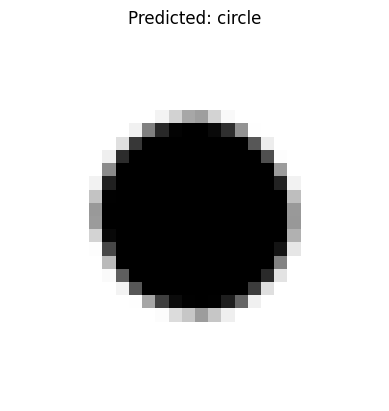

'circle'

In [34]:
predict_shape_from_image('/content/9.png', model, class_names)